<a href="https://colab.research.google.com/github/Areeff10/netflix_analysis/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/netflix_content_2023.csv')
dataset.head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [ ]:
dataset.shape

(24812, 7)

In [ ]:
dataset.isnull().sum()

,0
Title,0
Available Globally?,0
Release Date,16646
Hours Viewed,0
Language Indicator,0
Content Type,0
release_month,16646


## Total viewership hour by count type(2023)

In [ ]:
dataset['Hours Viewed'] = dataset['Hours Viewed'].str.replace(',', '').astype(float)

<ipython-input-58-7c50fc54af51>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content Type',y='Hours Viewed',data=content_type_viewership,palette='BuGn',width=0.5)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Total Hours Viewed (in billions)')

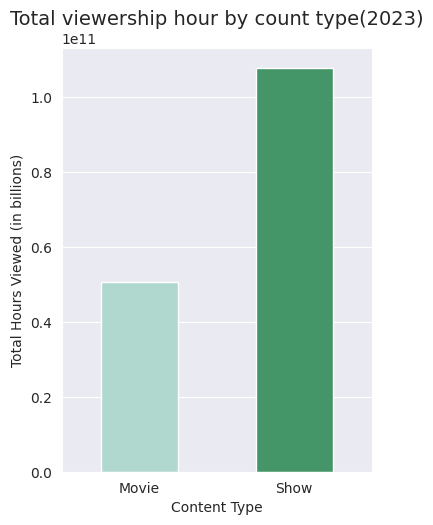

In [ ]:
content_type_viewership = pd.DataFrame(dataset.groupby('Content Type')['Hours Viewed'].sum())
sns.set_style('darkgrid')
plt.figure(figsize=(4,5.5))
sns.barplot(x='Content Type',y='Hours Viewed',data=content_type_viewership,palette='BuGn',width=0.5)
plt.title('Total viewership hour by count type(2023)',fontsize=14)
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')

# Total viewership hour by Language(2023)

<ipython-input-19-2b31021eb020>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language Indicator',y='Hours Viewed',data=language_viewship,palette='BuGn')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

<Axes: title={'center': 'Total viewership hour by Language(2023)'}, xlabel='Language Indicator', ylabel='Total Hours Viewed (in billions)'>

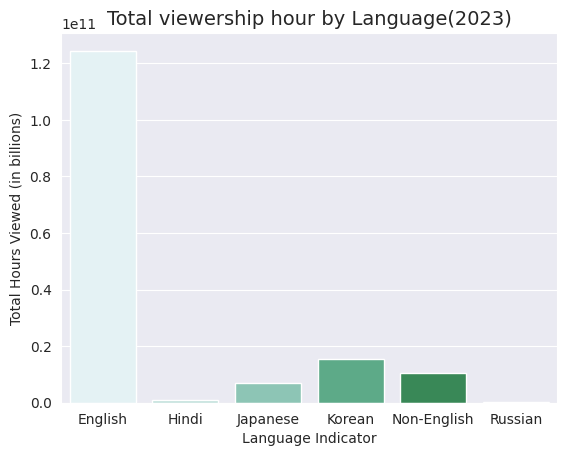

In [ ]:
language_viewship=pd.DataFrame(dataset.groupby('Language Indicator')['Hours Viewed'].sum())
language_viewship
sns.set_style('darkgrid')
plt.title('Total viewership hour by Language(2023)',fontsize=14)
plt.ylabel('Total Hours Viewed (in billions)')
sns.barplot(x='Language Indicator',y='Hours Viewed',data=language_viewship,palette='BuGn')

# Hours Viewed per Month(2023)

In [ ]:
dataset['Release Date']=pd.to_datetime(dataset['Release Date'])
dataset['release_month']=dataset['Release Date'].dt.month

month_viewship=pd.DataFrame(dataset.groupby('release_month')['Hours Viewed'].sum())
month_viewship = month_viewship.reset_index()

map={1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10:'Oct',11.0:'Nov',12.0:'Dec'}
month_viewship['release_month']=month_viewship['release_month'].map(map)


Text(0, 0.5, 'Hours Viewed (in billions)')

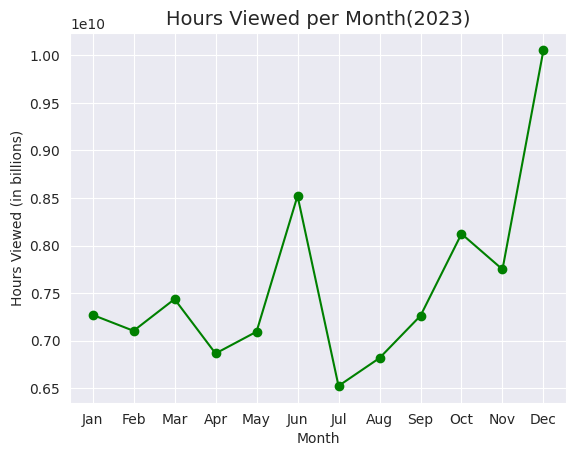

In [ ]:
sns.set_style('darkgrid')
plt.plot(month_viewship['release_month'], month_viewship['Hours Viewed'],marker='o',color='g')
plt.title('Hours Viewed per Month(2023)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Hours Viewed (in billions)')

# Most Hours Viewed

In [ ]:
most_hour_viewed=dataset.sort_values(by='Hours Viewed',ascending=False).head(5)
most_hour_viewed

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,release_month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8.0


# Viewership Trends by content type and Release month (2023)

In [ ]:
most_view_content=pd.DataFrame(dataset.groupby(['release_month','Content Type'])['Hours Viewed'].sum())
most_view_content = most_view_content.reset_index()
most_view_content['Hours Viewed']=most_view_content['Hours Viewed'].replace(',','').astype(float)

map={1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10:'Oct',11.0:'Nov',12.0:'Dec'}
most_view_content['release_month']=most_view_content['release_month'].map(map)

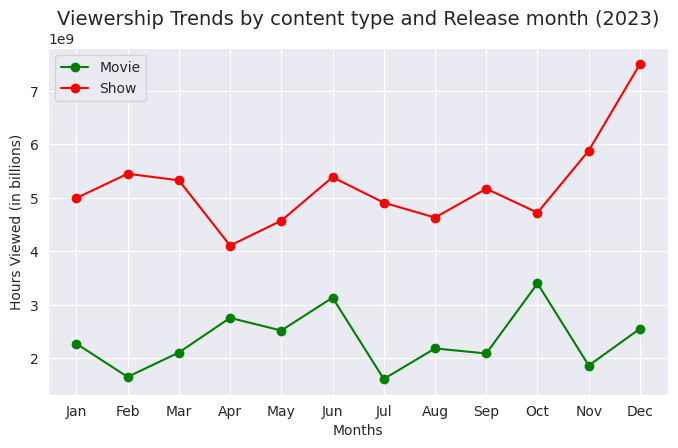

In [ ]:
plt.figure(figsize=(8,4.5))
movie_plot=plt.plot(most_view_content[most_view_content['Content Type']=='Movie']['release_month'],most_view_content[most_view_content['Content Type']=='Movie']['Hours Viewed'],marker='o',color='g')[0]
show_plot=plt.plot(most_view_content[most_view_content['Content Type']=='Show']['release_month'],most_view_content[most_view_content['Content Type']=='Show']['Hours Viewed'],marker='o',color='r')[0]
plt.xlabel('Months')
plt.ylabel('Hours Viewed (in billions)')
plt.title('Viewership Trends by content type and Release month (2023)',fontsize=14)
plt.legend([movie_plot, show_plot], ['Movie', 'Show'])

# Total viewship hour by release season(2023)

In [ ]:
def season(month):
  if month in ['Nov','Dec','Jan','Feb']:
    return 'Winter'
  elif month in ['May','Jun','Jul','Aug']:
    return 'Summer'
  elif month in ['Mar','Apr']:
    return 'Spring'
  elif month in ['Sep','Oct']:
    return 'Autumn'

month_viewship['season']=month_viewship['release_month'].map(season)

viewship_season=pd.DataFrame(month_viewship.groupby('season')['Hours Viewed'].sum()/10**6).reset_index()

Text(0.5, 1.0, 'Total viewship hour by release season(2023)')

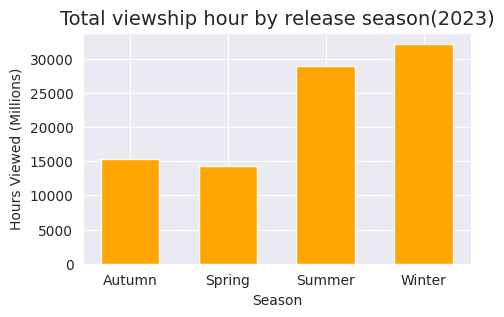

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(viewship_season['season'],viewship_season['Hours Viewed'],width=0.6,color = 'orange')
plt.xlabel('Season')
plt.ylabel('Hours Viewed (Millions)')
plt.title('Total viewship hour by release season(2023)',fontsize=14)

# Monthly release Pattern and viewership hour(2023)

In [ ]:
dataset['Release Date']=pd.to_datetime(dataset['Release Date'])
dataset['release_month']=dataset['Release Date'].dt.month

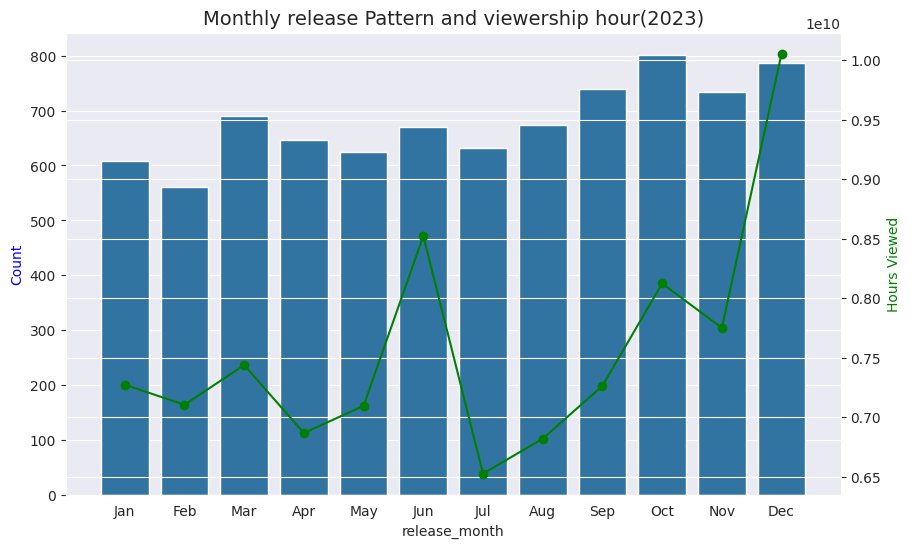

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

sns.countplot(data=dataset, x='release_month', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax1)
ax1.set_ylabel('Count', color='b')

ax2 = ax1.twinx()

ax2.plot(month_viewship['release_month'], month_viewship['Hours Viewed'], marker='o', color='g', label='Hours Viewed')
ax2.set_ylabel('Hours Viewed', color='g')
plt.title('Monthly release Pattern and viewership hour(2023)',fontsize=14)
plt.show()

# Weekly release pattern(2023)

In [ ]:
dataset['release_day']=dataset['Release Date'].dt.day_name()
weekday_release=dataset['release_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

<ipython-input-61-4529de198c2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_day', y='count',data=weekday_release,width=0.4,palette='RdBu')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Weekly release pattern(2023)')

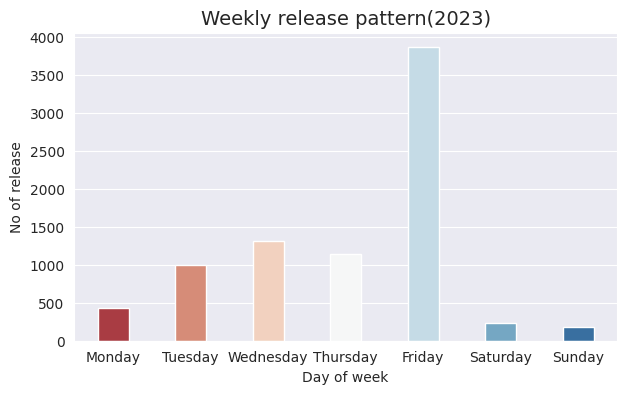

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x='release_day', y='count',data=weekday_release,width=0.4,palette='RdBu')
plt.xlabel('Day of week')
plt.ylabel('No of release')
plt.title('Weekly release pattern(2023)',fontsize=14)